In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# Download the dataset
!wget https://storage.googleapis.com/tensorflow-1-public/course3/sarcasm.json

--2023-12-24 00:09:36--  https://storage.googleapis.com/tensorflow-1-public/course3/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.203.207, 74.125.199.207, 142.250.107.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.203.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: 'sarcasm.json'

sarcasm.json        100%[===================>]   5.38M  --.-KB/s    in 0.08s   

2023-12-24 00:09:37 (64.8 MB/s) - 'sarcasm.json' saved [5643545/5643545]



In [3]:
import json
with open('sarcasm.json','r') as f:
    dataset = json.load(f)

sentences = []
labels = []
for item in dataset:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

In [4]:
test_split = 0.2
index = int(len(sentences)*test_split)

test_sentences = sentences[:index]
test_labels = labels[:index]
train_sentences = sentences[index:]
train_labels = labels[index:]

test_labels = np.array(test_labels)
train_labels = np.array(train_labels)

In [5]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [6]:
# Number of examples to use for training
training_size = 20000

# Vocabulary size of the tokenizer
vocab_size = 10000

# Maximum length of the padded sequences
max_length = 32

# Output dimensions of the Embedding layer
embedding_dim = 16

# Parameters for padding and OOV tokens
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

In [7]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index
train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_pad_sequences = pad_sequences(train_sequences, maxlen=max_length,padding=padding_type,
                                   truncating=trunc_type)
test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_pad_sequences = pad_sequences(test_sequences, maxlen=max_length, padding=padding_type,
                                  truncating=trunc_type)

In [8]:
model = keras.Sequential([
    keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    keras.layers.GlobalAveragePooling1D(),
    keras.layers.Dense(24, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [9]:
history = model.fit(train_pad_sequences, train_labels, epochs=20, batch_size=50, 
          validation_data=(test_pad_sequences,test_labels))

Epoch 1/20
428/428 [==============================] - 21s 40ms/step - loss: 0.6265 - accuracy: 0.6393 - val_loss: 0.4741 - val_accuracy: 0.8212
Epoch 2/20
428/428 [==============================] - 3s 7ms/step - loss: 0.3563 - accuracy: 0.8617 - val_loss: 0.3516 - val_accuracy: 0.8510
Epoch 3/20
428/428 [==============================] - 3s 7ms/step - loss: 0.2637 - accuracy: 0.8965 - val_loss: 0.3362 - val_accuracy: 0.8545
Epoch 4/20
428/428 [==============================] - 2s 6ms/step - loss: 0.2162 - accuracy: 0.9195 - val_loss: 0.3333 - val_accuracy: 0.8547
Epoch 5/20
428/428 [==============================] - 2s 5ms/step - loss: 0.1831 - accuracy: 0.9329 - val_loss: 0.3459 - val_accuracy: 0.8547
Epoch 6/20
428/428 [==============================] - 2s 5ms/step - loss: 0.1581 - accuracy: 0.9420 - val_loss: 0.3620 - val_accuracy: 0.8528
Epoch 7/20
428/428 [==============================] - 2s 5ms/step - loss: 0.1377 - accuracy: 0.9508 - val_loss: 0.3879 - val_accuracy: 0.8506
Epoc

In [10]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = history.epoch

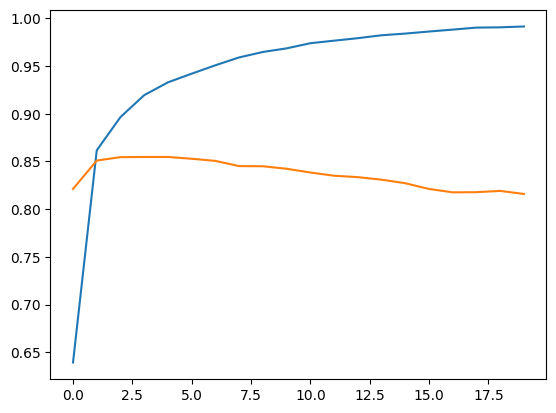

In [11]:
import matplotlib.pyplot as plt
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)

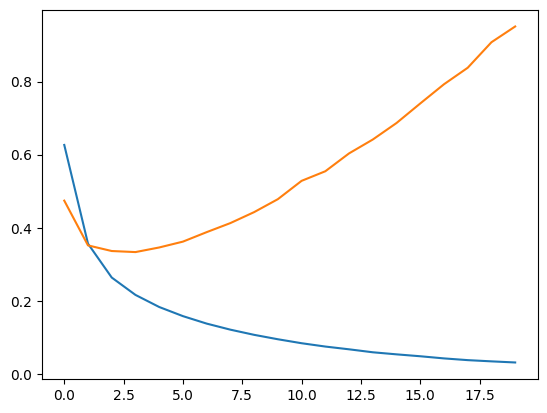

In [12]:
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)

In [13]:
reverse_word_index = tokenizer.index_word
embedding_layer = model.layers[0]
embedding_weights = embedding_layer.weights[0]

In [14]:
import io
out_v = io.open('vecs.tsv','w',encoding='utf8')
out_m = io.open('vecs.tsv','w',encoding='utf8')

for word_num in range(1,vocab_size):
    word = reverse_word_index[word_num]
    out_m.write(word+"\n")
    
    embedding = embedding_weights[word_num]
    out_v.write("\t".join(str(x) for x in embedding)+"\n")

out_v.close()
out_m.close()